In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv('student_bulkdata.csv')

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,MS,M,17,R,LE3,A,1,1,teacher,at_home,...,yes,no,1,1,2,5,1,1,17,medium
1,MS,F,21,U,LE3,T,2,1,services,teacher,...,no,yes,4,2,3,2,2,5,1,medium
2,GP,M,15,R,LE3,A,0,2,teacher,other,...,yes,yes,3,1,5,5,5,1,4,high
3,MS,F,15,R,LE3,T,1,4,services,other,...,no,no,4,4,1,5,4,3,7,medium
4,GP,F,18,R,LE3,A,4,0,other,teacher,...,yes,no,1,5,3,2,4,5,16,high


In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reson         0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      5000 non-null   object
 1   sex         5000 non-null   object
 2   age         5000 non-null   int64 
 3   address     5000 non-null   object
 4   famsize     5000 non-null   object
 5   Pstatus     5000 non-null   object
 6   Medu        5000 non-null   int64 
 7   Fedu        5000 non-null   int64 
 8   Mjob        5000 non-null   object
 9   Fjob        5000 non-null   object
 10  reson       5000 non-null   object
 11  guardian    5000 non-null   object
 12  traveltime  5000 non-null   int64 
 13  studytime   5000 non-null   int64 
 14  failures    5000 non-null   int64 
 15  schoolsup   5000 non-null   object
 16  famsup      5000 non-null   object
 17  paid        5000 non-null   object
 18  activities  5000 non-null   object
 19  nursery     5000 non-null   object
 20  higher  

<Axes: xlabel='sex', ylabel='age'>

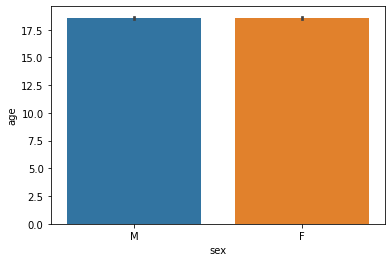

In [ ]:
sns.barplot(x='sex',y='age',data=df)

<Axes: xlabel='Fjob', ylabel='absences'>

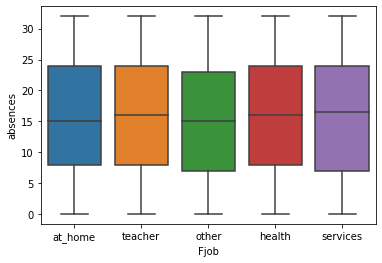

In [ ]:
sns.boxplot(x='Fjob',y='absences',data=df)

<Axes: xlabel='Mjob', ylabel='absences'>

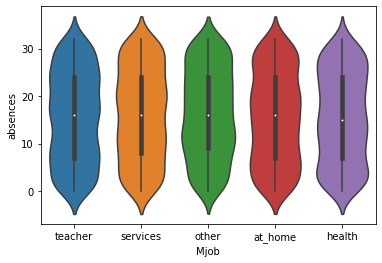

In [ ]:
sns.violinplot(x='Mjob',y='absences',data=df)

<Axes: xlabel='Pstatus', ylabel='age'>

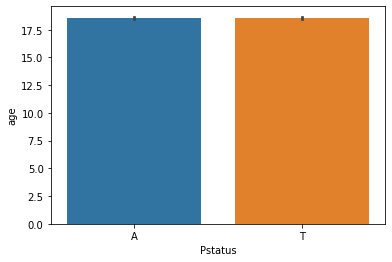

In [ ]:
sns.barplot(x='Pstatus',y='age',data=df)

In [ ]:
print(df['grade'].head())

0    medium
1    medium
2      high
3    medium
4      high
Name: grade, dtype: object


In [ ]:
df['grade'].min()

'high'

<Axes: xlabel='grade', ylabel='count'>

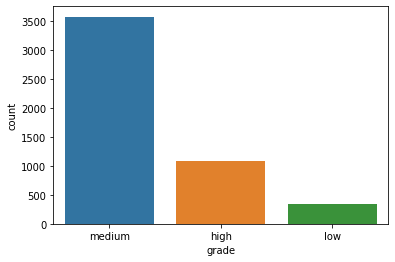

In [ ]:
sns.countplot(x='grade',data=df)

In [ ]:
df['grade'].value_counts()

medium    3571
high      1083
low        346
Name: grade, dtype: int64

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,MS,M,17,R,LE3,A,1,1,teacher,at_home,...,yes,no,1,1,2,5,1,1,17,medium
1,MS,F,21,U,LE3,T,2,1,services,teacher,...,no,yes,4,2,3,2,2,5,1,medium
2,GP,M,15,R,LE3,A,0,2,teacher,other,...,yes,yes,3,1,5,5,5,1,4,high
3,MS,F,15,R,LE3,T,1,4,services,other,...,no,no,4,4,1,5,4,3,7,medium
4,GP,F,18,R,LE3,A,4,0,other,teacher,...,yes,no,1,5,3,2,4,5,16,high


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['school'].value_counts()

MS    2524
GP    2476
Name: school, dtype: int64

In [ ]:
df['school'] = df['school'].replace(('GP','MS'),(0,1))

In [ ]:
df['sex'].value_counts()

M    2509
F    2491
Name: sex, dtype: int64

In [ ]:
df['sex'] = df['sex'].replace(('F','M'),(0,1))

In [ ]:
df.keys()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reson', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'grade'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.keys(): 
    if df[i].dtype == 'object' and i!='grade':
        df[i]=le.fit_transform(df[i])

In [ ]:
x = df.drop(['grade'],axis = 1)
y = df['grade']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33, shuffle =True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

import time
start=time.time()


model = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=33) #criterion can be entropy
model.fit(x_train, y_train)
train_dt_acc = model.score(x_train, y_train)

print('model Train Score is : ' , model.score(x_train, y_train))

y_test = model.predict(x_test)
test_dt_acc = model.score(x_test, y_test)
print('model test Score is : ' , model.score(x_test, y_test))

end=time.time()
time_dt=end-start

model Train Score is :  0.971
model test Score is :  1.0


In [ ]:
x.keys()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reson', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

In [ ]:
model.predict([x.iloc[5]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['low'], dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

import time
start=time.time()

rf = RandomForestClassifier(criterion='gini',max_depth=10,random_state=33) #criterion can be entropy
rf.fit(x_train, y_train)
train_rf_acc = rf.score(x_train, y_train)
print('model Train Score is : ' , rf.score(x_train, y_train))

y_test = rf.predict(x_test)
test_rf_acc = rf.score(x_test, y_test)
print('model test Score is : ' , rf.score(x_test, y_test))

end=time.time()
time_rf=end-start

model Train Score is :  0.95525
model test Score is :  1.0


In [ ]:
rf.predict([x.iloc[5]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['low'], dtype=object)

In [ ]:
from sklearn.svm import SVC

import time
start=time.time()

sv = SVC()
sv.fit(x_train, y_train)
train_sv_acc = sv.score(x_train, y_train)
print('model Train Score is : ' , sv.score(x_train, y_train))

y_test = sv.predict(x_test)
test_sv_acc = sv.score(x_test, y_test)
print('model test Score is : ' , sv.score(x_test, y_test))

end=time.time()
time_sv=end-start

model Train Score is :  0.71325
model test Score is :  1.0


In [ ]:
sv.predict([x.iloc[60]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['medium'], dtype=object)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

import time
start=time.time()

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(x_train, y_train)
train_knn_acc = knn.score(x_train, y_train)
print('model Train Score is : ' , knn.score(x_train, y_train))

y_test = knn.predict(x_test)
test_knn_acc = sv.score(x_test, y_test)
print('model test Score is : ' , knn.score(x_test, y_test))

end=time.time()
time_knn=end-start

model Train Score is :  0.80875
model test Score is :  1.0


In [ ]:
knn.predict([x.iloc[60]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['medium'], dtype=object)

In [ ]:
data1 = pd.DataFrame({'Algorithm':['Decision Tree','Random Forest','SVM','KNN'],
                    'Accuracy':[train_dt_acc,train_rf_acc,train_sv_acc,train_knn_acc]})

In [ ]:
data2=pd.DataFrame({'Algorithm':['Decision Tree','Random Forest','SVM','KNN'],'ExecutionTime':[time_dt,time_rf,time_sv,time_knn]})

In [ ]:
data1

,Algorithm,Accuracy
0,Decision Tree,0.97100
1,Random Forest,0.95525
2,SVM,0.71325
3,KNN,0.80875


In [ ]:
data2

,Algorithm,ExecutionTime
0,Decision Tree,0.069165
1,Random Forest,0.820088
2,SVM,3.217514
3,KNN,1.349093


Text(0.5, 1.0, 'Comparision of accuracy score for various algorithms')

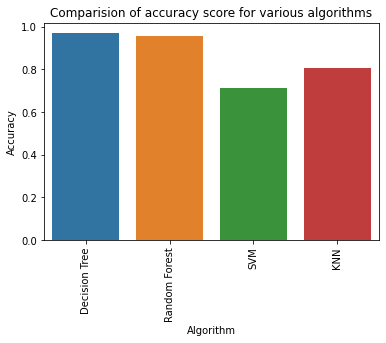

In [ ]:
sns.barplot(x='Algorithm',y='Accuracy',data=data1)
plt.xticks(rotation=90)
plt.title('Comparision of accuracy score for various algorithms')

Text(0.5, 1.0, 'Comparision af execution time for various algorithms')

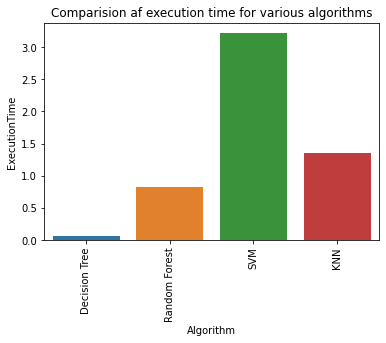

In [ ]:
sns.barplot(x='Algorithm',y='ExecutionTime',data=data2)
plt.xticks(rotation=90)
plt.title('Comparision af execution time for various algorithms')